# Day 09 - In-Class Activity: Understanding Parameter-Fitting by Exploring Viral Load

# Student names: Xue Haoran, Wang Shuyang, Megatjohari Megat, Beemelmanns Till

Work in pairs, and put the names of both people in your group here!

# Learning Goals (Why Are We Asking You To Do This?)

- To develop an intuition about how equation-based models work
- To understand how to evaluate models by plotting them together with experimental data
- To practice predicting what the effect will be when we change the parameters of a model
- To learn how we can iterate to improve the fit of a model


# Understanding How We Treat the [Human Immunodeficiency Virus (HIV)](https://www.aids.gov/hiv-aids-basics/hiv-aids-101/what-is-hiv-aids/)

Here we explore a model of the **viral load**—the number of virions in the blood of a patient infected with [HIV](https://www.aids.gov/hiv-aids-basics/hiv-aids-101/what-is-hiv-aids/)—after the administration of an antiretroviral drug. One model for the viral load predicts that the concentration $V (t)$ of HIV in the blood at time t after the start of treatment will be:

$$ \begin{equation} V(t) = A \cdot \mathrm{exp}(-\alpha t) + B \cdot \mathrm{exp}(-\beta t) \end{equation}$$ 

When we write mathematics, $\mathrm{exp}(\dots)$ is notational shorthand for $e^{(\dots)}$. So, we can rewrite the viral load model this way:

$$  
\begin{equation}
V(t) = A e^{(-\alpha t)} + B e^{(-\beta t)}  
\end{equation}
$$

Two things to note about this particular model: 

1. Viral load **is a function of time $t$**. That's why we're writing it as $V(t) = \dots$. 
2. There are four modeling parameters (numbers) we can vary: $(A, \alpha, B, \beta )$.:


$$  
\begin{equation}
V(t) = \textbf{A} e^{(-\boldsymbol{\alpha} t)} + \textbf{B} e^{(- \boldsymbol{\beta} t)}  
\end{equation}
$$

**Note**: 

> You probably know that there are black-box software packages that do such “curve fitting” automatically. In this lab, you should do it manually, just to see how the curves respond to changes in the parameters.]
> 
> Kinder, Jesse M.; Nelson, Philip (2015-07-01). A Student's Guide to Python for Physical Modeling (Page 63). Princeton University Press. Kindle Edition. 


Doing it manually also helps build our intuition for how mathematical models behave when we visualize them.

Let's get started by setting some options and loading the modules we'll need.

# Setting options and loading modules

In [43]:
# Make plots inline
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# import modules for plotting and data analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas

Now, we'll tackle the "function in time" part of this model by learning how to make and use arrays to represent time.

In [66]:
# Use np.linspace to create a time array
time = np.linspace(0, 50, 101)

# We can set and change parameter values to see how the model behaves

Remember how our model equation has four parameters $(A, \alpha, B, \beta )$? Below, you're going to use Python code to see what happens to the model when we try (and change) values for those parameters. Below, write  code that sets $B = 0$ and chooses non-zero values for the other three parameters.

In [70]:
# Make B equal to zero and set some non-zero values for the other parameters

A = 1
alpha = 1
B = 1 
beta = 1

## PREDICT BEFORE YOU PLOT

Here's that viral load equation again:

$$  
\begin{equation}
V(t) = \textbf{A} e^{(-\boldsymbol{\alpha} t)} + \textbf{B} e^{(- \boldsymbol{\beta} t)}  
\end{equation}
$$

Just like the order-of-magnitude approximations we've been doing, thinking *before* we plot and evaluate helps us develop our intution about models. In your code above, you've set $B = 0$. Use the markdown cell below to predict (**in words**) how you think setting $B = 0$ affects the equation (and by extension, the model).

### Your Prediction

When we set B = 0, we think what will happen is...

By setting $B=0$ we transfer bi-exponential decay to a single exponential decay. The second summand of $V(t) = \textbf{A} e^{(-\boldsymbol{\alpha} t)} + \textbf{B} e^{(- \boldsymbol{\beta} t)}  $ is cancelled out. Hence, we end up having a single exponential decay function $V(t) = \textbf{A} e^{(-\boldsymbol{\alpha} t)}$ with parameters $A=3$ and $\alpha = 2$. That means $V(t)$ starts at value 3 for $t=0$ and further, it decreases with an exponential decay with factor 2. For increasing t, we will observe that the function v(t) goes to 0, since $\lim\limits_{t \rightarrow \infty} V(t) \rightarrow 0$.


We can write the viral load function (from above) in Python, using the parameters we set above and our `time` array. In the cell below, write `viral_load` as a function of `time`.

**Note**: We can write exponentation in numpy using `np.exp()`. So,

$$ 
\begin{equation}
e^{(\dots)} = \tt{np.exp(\dots)}  
\end{equation}
$$

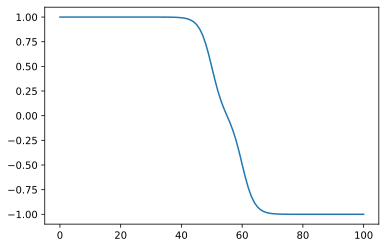

In [94]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


plt.plot(sigmoid(-(time-25)) - sigmoid((time-30)) )

In [87]:
# Define a function to evaluate viral_load as a function of time
# your code here
def f_viral_load(A, alpha, B, beta, t):
    return A*sigmoid(-alpha*t) - B * sigmoid(beta*t)

# Write the code that calls the function to calculate the predicted viral load with time
# your code here
viral_load = f_viral_load(A, alpha, B, beta, time)

You should now have two arrays of the same length, `time` and `viral load`. In the Python cell below, verify that they're the same length (have the same number of values), then plot them.

(101,)
(101,)


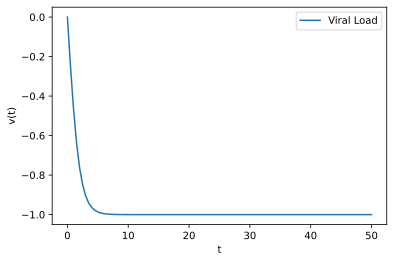

In [78]:
# your code here
print(np.shape(time))
print(np.shape(viral_load))

plt.plot(time, viral_load, label="Viral Load")
plt.ylabel("v(t)")
plt.xlabel("t")
plt.legend()
plt.show()

## Explore the model by changing parameter values

Create **three** more plots using different values of the four model parameters. For each new plot, 

1. Use a Python cell to change the model parameters however you'd like,
2. Re-evaluate the `viral_load`
3. Use a markdown cell to explain how the curve changed

**Remember**: You can try negative (and non-integer) values for parameters

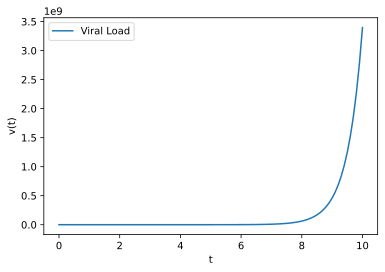

In [63]:
viral_load = f_viral_load(A=7, alpha=2, B=0, beta=5, t=time)

plt.plot(time, viral_load, label="Viral Load")
plt.ylabel("v(t)")
plt.xlabel("t")
plt.legend()
plt.show()

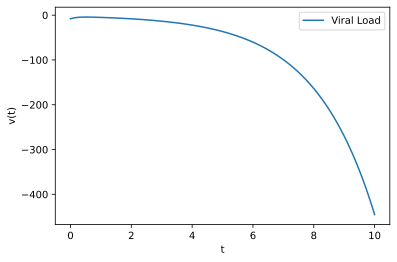

In [64]:
viral_load = f_viral_load(A=-3, alpha=0.5, B=5, beta=5, t=time)

plt.plot(time, viral_load, label="Viral Load")
plt.ylabel("v(t)")
plt.xlabel("t")
plt.legend()
plt.show()

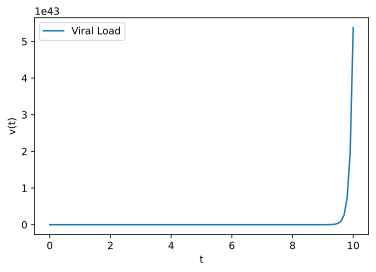

In [65]:
viral_load = f_viral_load(A=2, alpha=10, B=4, beta=0.01, t=time)

plt.plot(time, viral_load, label="Viral Load")
plt.ylabel("v(t)")
plt.xlabel("t")
plt.legend()
plt.show()

***Plot 1***
- Changed $A=3$ to $A=7$: The initical concentration of $V(t=0)$ changed from $3$ to $7$. The overall shaped stayed the same since $B=0$ and $\alpha = 2$ did not change at all. We can observe as in the original figure a fast decay that goes to 0.

***Plot 2***
- New parameter set with $A=-3$, $\alpha=0.5$, $B=5$ and $\beta=5$. Initial value is now 2, we expierence a very fast decay of $V(t)$ that eventually is smaller than zero for $t \ge 0.1$. This can be explained by the fact that with $A=-3$ a negative exponential decay is added to a mainly positive exponential decay with a very high decay rate. Hence, the importance of the positve part of the function decreases directly for $t \ge 0.1$ and the negative one dominates the overall function. As expected the function goes to 0 for bigger values of t. 

***Plot 3***
- New parameter set with $A=2, \alpha=10, B=4$ and $\beta=0.01$. The intial value is again the sum of A and B (here $6$). As the decay of the first component of the bi-decay function is set to a very high number (here $\alpha=10$), the inital value of $v(t)$ rapidly decreases to approx. 4 which is the initial value of the second component. However, the second component has a very low decay rate (here $\beta=0.01$), so that the second one dominates the overall function for $t \ge 0.1$. We can see that even for $t=10$ the overall function value has not reached 0 yet. This can be explained by the fact that the decay rate of the dominant component is very low and thus the decrease has not reached 0 yet.

# Loading and Examining Experimental Data


## What is this data?

We're going to use experimental data of actual viral loads provided by Kindler and Nelson (2015). They write:

> File `HIVseries.mat` contains variable "a" with two columns of data.  The first is the time in days since administration of a treatment to an HIV positive patient; the second contains the concentration of virus in that patient's blood, in arbitrary units.
>
> `HIVseries.csv` and `HIVseries.npy` contain the same data in the same format. `HIVseries.npz` contains the same data in two separate arrays called `time_in_days` and `viral_load`.
>
> Data from A. Perelson. [Modelling viral and immune system dynamics][1]. Nature Revs. Immunol. (2002) vol. 2 (1) pp. 28--36 (Box 1).

So, to summarize, the dataset `hiv_data` has 2 columns:

- `time_in_days` is the number of days since an HIV-positive patient received a treatment.
- `viral_load` is the concentraiton of the virus in that patients blood, in arbitrary units.

[1]: http://www.nature.com/nri/journal/v2/n1/abs/nri700.html


## Use `pandas.read_csv()` to Load the Data

The data file we'll use is in a file format called [CSV][1], which stands for **comma-separated values**. It's a commonly used format for storing 2-dimensional data, and programs like Microsoft Excel can import and export .CSV files.

The code below will use the [`read_csv()`][3] function from the [pandas data analysis library][2] to load the CSV file you need from the web, then store the data as a variable called `hiv_data`.

[1]: https://en.wikipedia.org/wiki/Comma-separated_values
[2]: http://pandas.pydata.org
[3]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html?highlight=read_csv#pandas.read_csv

In [30]:
# Loading the data
hiv_data = pandas.read_csv(
    "https://raw.githubusercontent.com/ComputationalModeling/IPML-Data/master/01HIVseries/HIVseries.csv",
    header = None,
    names = ["time_in_days", "viral_load"]
)

# the data type of hiv_data is "dataframe"
type(hiv_data)

pandas.core.frame.DataFrame

## You Can View a Pandas DataFrame by Executing It

In [31]:
# Execute this cell (Shift + Enter) to see the data
hiv_data

,time_in_days,viral_load
0,0.0000,106100.0
1,0.0831,93240.0
2,0.1465,166720.0
3,0.2587,153780.0
4,0.4828,118800.0
5,0.7448,116900.0
6,0.9817,109570.0
7,1.2563,111350.0
8,1.4926,74388.0
9,1.7299,83291.0


## You can view the first/last few rows of data with `.head()` and `.tail()` functions

In [32]:
# If you have a pandas dataframe, you can call `head()` on it like this:
hiv_data.head()

,time_in_days,viral_load
0,0.0000,106100.0
1,0.0831,93240.0
2,0.1465,166720.0
3,0.2587,153780.0
4,0.4828,118800.0


In [33]:
# To see the last few rows, call `tail()` on it
hiv_data.tail()

,time_in_days,viral_load
11,3.0011,35408.0
12,4.0109,21125.0
13,5.0090,20450.0
14,5.9943,15798.0
15,7.0028,4785.2


## Use `data["column_name"]` to View or Refer to a Column of Data

In [34]:
# How to view an individual column
hiv_data["time_in_days"] # or
hiv_data["viral_load"]

0     106100.0
1      93240.0
2     166720.0
3     153780.0
4     118800.0
5     116900.0
6     109570.0
7     111350.0
8      74388.0
9      83291.0
10     66435.0
11     35408.0
12     21125.0
13     20450.0
14     15798.0
15      4785.2
Name: viral_load, dtype: float64

## Pandas DataFrame Columns Behave Like Numpy Arrays

In [35]:
# Here's the viral load column again
hiv_data["viral_load"]

0     106100.0
1      93240.0
2     166720.0
3     153780.0
4     118800.0
5     116900.0
6     109570.0
7     111350.0
8      74388.0
9      83291.0
10     66435.0
11     35408.0
12     21125.0
13     20450.0
14     15798.0
15      4785.2
Name: viral_load, dtype: float64

In [36]:
# And we can calulate its mean, max, size, and other properties
# Just like we would on a numpy array
hiv_data["viral_load"].mean()

81133.7625

In [37]:
hiv_data["viral_load"].max()

166720.0

In [38]:
hiv_data["viral_load"].size

16

## Plotting the Experimental Data

In a Python cell below, plot the viral load versus time from the `hiv_data` we loaded.

Text(0, 0.5, 'Viral Load Concentration')

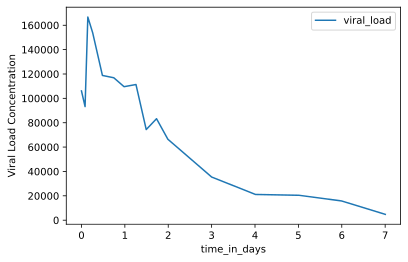

In [39]:
# Plot viral load vs. time
hiv_data.plot(x="time_in_days", y="viral_load")
plt.ylabel("Viral Load Concentration")

# Fitting Our Model To Experimental Data

Now that we've seen what the experimental data look like, we'll take our model one step further by putting the data and our model together on the same plot.

## Plot the Data and Model Together

In the Python Cell below, create a plot that contains both the data and the model we were working with earlier. So, we'll superimpose the datapoints on a plot of $V(t) = A e^{(-\alpha t)} + B e^{(-\beta t)}$. You may need to adjust the model parameters until you can see both the data and model in your plot.

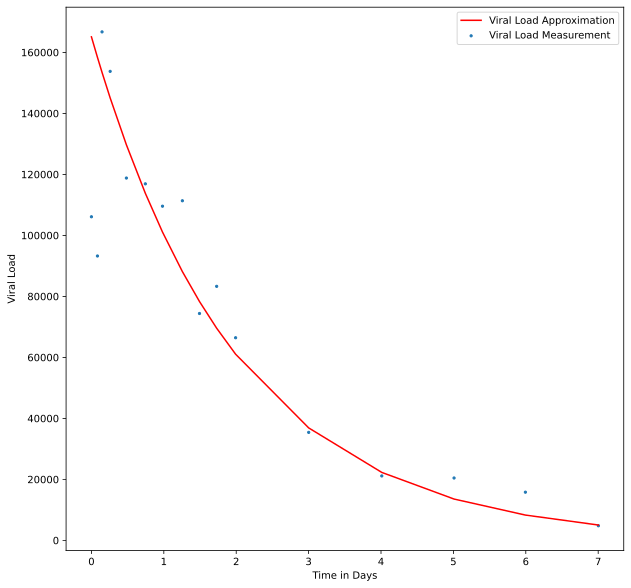

In [40]:
# Plot the data and model together
viral_load = f_viral_load(A=165000, alpha=0.5, B=100, beta=0.1, t=hiv_data["time_in_days"])

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(hiv_data["time_in_days"], viral_load, label="Viral Load Approximation", color="red")
hiv_data.plot.scatter(x="time_in_days", y="viral_load", marker=".", label="Viral Load Measurement", ax=ax)

plt.ylabel("Viral Load")
plt.xlabel("Time in Days")
plt.legend()

## THINK about Tuning the Model Parameters to Fit the Model to Data

The goal will be to tune the four parameters of $V(t) = A e^{(-\alpha t)} + B e^{(-\beta t)}$ until the model agrees with the data. It is hard to find the right needle in a four-dimensional haystack! We need a more systematic approach than just guessing. **Consider and try to answer** each of the following in a Markdown cell below:

1. Assuming $\beta > \alpha$, how does the trial solution behave at long times? 
2. If the data also behave that way, can we use the long-time behavior to determine two of the four unknown constants, then hold them fixed while adjusting the other two? 
3. Even two constants is a lot to adjust by hand, so let’s think some more: How does the initial value $V(0)$ depend on the four constant parameters? 
4. Can you vary these constants in a way that always gives the correct long-time behavior and initial value? (Kinder and Nelson, 2015, p. 62)

1. For a greater $\beta$ compared to $\alpha$ we can observe the following long-term behavior: The second component of the function will decay faster than the first one. By this means, the influence of $B$ will decrease with increasing $t$ whereas $A$ gets more important to the overall value of $v(t)$. If we have a very high value of $\beta$ and a very low value for $\alpha$, then the influence of B drops immediately whereas the influence of A persists over a long term.   
2. Yes this is possible, if we would have a unambiguous long-term behavior of the measurement. But unfortunately our measurement do not cover additional timesteps. It is not clear if the measurements will hold on a constant level or if the measurements will decay further for $t \gt 7$. But if we would hava a distinct longterm behavior we could easily fit one component of the bi-decay function to this long-term behavior and adjust the other one for the initial behavior. 
3. $V(0)$ is the sum of $A$ and $B$. Hence, we could choose $A = 0.5 * V(0)$ and $B = 0.5 * V(0)$. Unfortunately, the data is a bit noisy and the first measurement do not fit the overall shape of the decay function. (First and second datapoints are smaller than the third measurement)
4. The perfect initial value can be easily determined by choosing $A + B = V(0)$. The correct long-term behavior can be simulated by the following. We take a component with a low decay rate and set the initial value to long term measurement value.   

## Make and Plot Multiple Models to Find Model Parameters that Best Fit the Model to the Data

Kinder and Nelson (2015) recommend that you:

> Carry out this analysis so that you have only one remaining free parameter, which you can adjust fairly easily. Adjust this parameter until you like what you see.

We suggest you **try and save different models** by assigning those models to named variables. For example, you might try:

```python
# Parameters for Model 1
A = 1
B = 3

## Evaluate model 1
model_01 = (A * np.exp(alpha * time)) + (B * np.exp(beta * time))

## Plot model 1
plt.plot(time, model_01)

# Trying new parameter values for Model 2
A = 3
B = -5
alpha = 0.5

# Evaluate model 2
model_02 = (A * np.exp(alpha * time)) + (B * np.exp(beta * time))

# Plot model 2
plt.plot(time, viral_load)

# and so on until you find values you like
```

Use one or more Python cells below to create multiple models and decide on good parameter values.

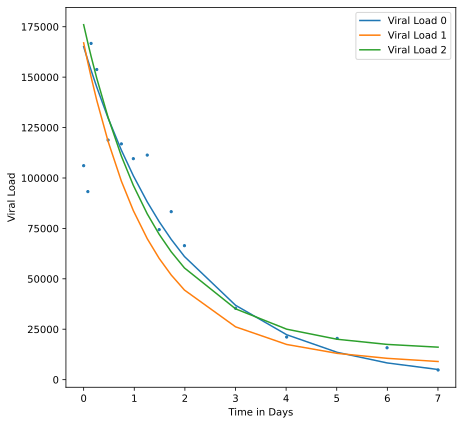

In [41]:
fig, ax = plt.subplots(figsize=(7, 7))
hiv_data.plot.scatter(x="time_in_days", y="viral_load", marker=".", ax=ax)
    
models = []
for (A, alpha, B, beta) in [(165000, 0.5, 100, 0.1), (150000, 0.8, 17000, 0.1), (160000, 0.7, 16000, 0.01)]:
    models.append(f_viral_load(A=A, alpha=alpha, B=B, beta=beta, t=hiv_data["time_in_days"]))
    
    
for i, model in enumerate(models):
    ax.plot(hiv_data["time_in_days"], model, label="Viral Load " + str(i))

    
plt.ylabel("Viral Load")
plt.xlabel("Time in Days")
plt.legend()

## Bonus: Finding fit parameters with linear regression (50 points)

Assume the experimental data can be modeled with $y=b*exp(a*x)$, then $ln(y)=a*x+ln(b)$. We could try to do a linear regression on the natural log (i.e., $ln$) of the data. You can use the linear regression tool provided below, or you can come up with your own solution of doing the linear regression. Please come up with the model parameters a and b, and plot the predicted viral load on the same graph with the experimental data.

* [useful reading on least squares fitting](http://mathworld.wolfram.com/LeastSquaresFitting.html)

In [42]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
ransac = linear_model.RANSACRegressor()

# get the data
x=hiv_data["time_in_days"]
y=hiv_data["viral_load"]

# numpy array transforms
x=np.array(x)
y=np.array(y)
x=np.reshape(x,(16,1))
y=np.reshape(y,(16,1))

# use the log transformation
y=np.log(y)

# perform the fitting
reg = lm.fit(x, y)
ran = ransac.fit(x, y)

print("Linear Reg:")
print("Score: ",reg.score(x, y))
print("Slope: ",reg.coef_)
print("Y-Axis: ", reg.intercept_)


print("\n\nRANSAC Reg:")
print("Score: ", ran.score(x, y))
print("Slope: ", ransac.estimator_.coef_)
print("Y-Axis: ", ransac.estimator_.intercept_)

# compute the fittet y values based on slope and y-axis intersection
y_fit_reg = reg.coef_ * x + reg.intercept_
y_fit_ran = ransac.estimator_.coef_ * x + ransac.estimator_.intercept_


# New figure for plotting
plt.figure()
plt.plot(x,y_fit_reg, label="Linear Fit Regression")
plt.plot(x,y_fit_ran, label="RANSAC Regression")
plt.plot(x,y, label="Measurements", marker=".", linestyle=" ")
plt.ylabel("log(Measurements)")
plt.xlabel("Time in days")
plt.legend()
plt.show()



# Back transform with exp for linear
A_est_reg = np.exp(reg.coef_)[0][0]
B_est_reg = np.exp(reg.intercept_)[0]
print("Linear Fit Regression:")
print("Estimation for A= ", A_est)
print("Estimation for B= ", B_est)


# Back transform with exp for ransac
A_est_ran = np.exp(ransac.estimator_.coef_)[0][0]
B_est_ran = np.exp(ransac.estimator_.intercept_)[0]
print("RANSAC Regression:")
print("Estimation for A= ", A_est)
print("Estimation for B= ", B_est)


def myexp(A, alpha, t):
    return A*np.exp(-alpha * t)


# New figure for plotting
plt.figure()
plt.plot(hiv_data["time_in_days"], myexp(B_est_reg, A_est_reg, hiv_data["time_in_days"]), label="Linear Fit Regression" )
plt.plot(hiv_data["time_in_days"], myexp(B_est_ran, A_est_ran, hiv_data["time_in_days"]), label="RANSAC Regression" )
plt.plot(hiv_data["time_in_days"], hiv_data["viral_load"], label="Measurement", marker=".", linestyle=" ")
plt.ylabel("Viral Load")
plt.xlabel("Time in Days")
plt.legend()

ModuleNotFoundError: No module named 'sklearn'

Since linear_model.LinearRegression uses an ordinatry least squares without ransac, the fitting is very sensitiv to outliers. The first two measurements are probably outliers, because the do not match the general shape of the exponential decay. These two values are smaller than the following although exponential decay assume a monotonical slope and thus they pollute the result of the linear fit. Ransac is designed to ignore outliers and hence the solution of ransac seems to be more robust as it ignores outliers for the linear fit. 

---
### Assignment wrapup

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLSdphgLMjbQEWMLJMtlaGVz3IvTqGQk7jQVSO5SLSGDGv8lWjQ/viewform?usp=pp_url" 
	width="80%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you are done!  Great work! 

***
# How to submit this assignment

Log into the course Desire2Learn website (d2l.msu.edu) and go to "Assessments > Assignments > Day 09 in-class assignment".

# Source

This tutorial is adapted from:

Kinder, Jesse M.; Nelson, Philip (2015-07-01). A Student's Guide to Python for Physical Modeling (pp. 61–64). Princeton University Press. Kindle Edition. 